In [32]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [51]:
(x_train, y_train),(x_test, y_test)=keras.datasets.mnist.load_data()  #mnist contains the handwritten number0-9

In [38]:
len(x_train)

60000

In [39]:
len(x_test)

10000

In [40]:
x_train[0].shape

(28, 28)

In [42]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

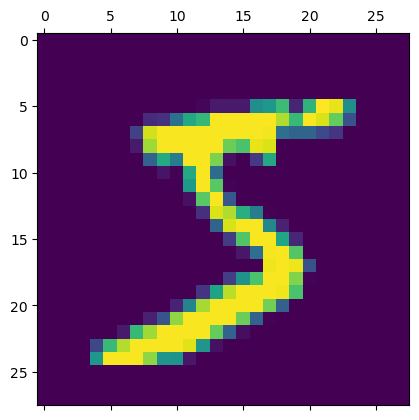

In [44]:
plt.matshow(x_train[0])

In [61]:
x_train=x_train / 255        #scalling 0-1

In [62]:
x_test=x_test / 255

In [63]:
x_train_flattened=x_train.reshape(len(x_train),28*28) # reshape change the dimension from (60000,28,28) to (60000,784) for the 1st neaural_layer
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [64]:
x_train_flattened.shape

(60000, 784)

In [65]:
x_test_flattened.shape

(10000, 784)

In [66]:
x_train_flattened[0] #become the single dimensional array for the 1st neaural layer

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [67]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8092 - loss: 0.7362
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9134 - loss: 0.3103
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9191 - loss: 0.2896
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9237 - loss: 0.2741
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9246 - loss: 0.2659


In [68]:
model.evaluate(x_test_flattened,y_test)  #evaluate accuracy through test dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9134 - loss: 0.3033


[0.26722121238708496, 0.925000011920929]

In [76]:
y_predicted=model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step


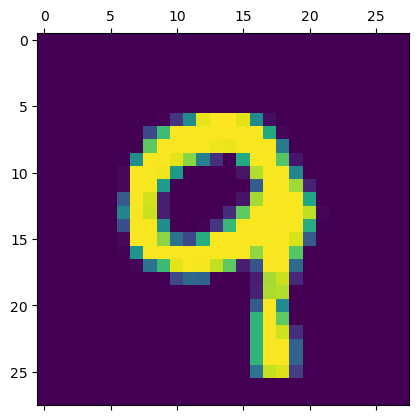

In [81]:
plt.matshow(x_test[99])

In [78]:
y_predicted[0]

array([2.09499821e-02, 2.97966039e-07, 6.02634065e-02, 9.52226758e-01,
       2.23438255e-03, 1.30676657e-01, 1.20714458e-06, 9.99767959e-01,
       1.02557525e-01, 6.62598848e-01], dtype=float32)

In [82]:
np.argmax(y_predicted[99])

9

In [87]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]   #get the array of result 
y_predicted_labels[:5]   #first 5 prediction

[7, 2, 1, 0, 4]

In [89]:
y_test[:5]  # first 5 actual test data

array([7, 2, 1, 0, 4], dtype=uint8)

In [91]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    4,    2,    3,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   6,   10,  915,   18,    9,    5,   12,   10,   44,    3],
       [   2,    0,   18,  918,    1,   27,    2,   11,   24,    7],
       [   2,    1,    5,    1,  928,    0,    8,    4,   10,   23],
       [   7,    3,    3,   36,   10,  778,   12,    5,   33,    5],
       [  11,    3,    6,    1,    8,   16,  907,    2,    4,    0],
       [   1,    8,   21,    9,    8,    0,    0,  945,    4,   32],
       [   5,   12,    5,   17,    9,   27,    8,   10,  875,    6],
       [  10,    7,    1,    9,   33,    6,    0,   26,   13,  904]])>

Text(95.72222222222221, 0.5, 'truth')

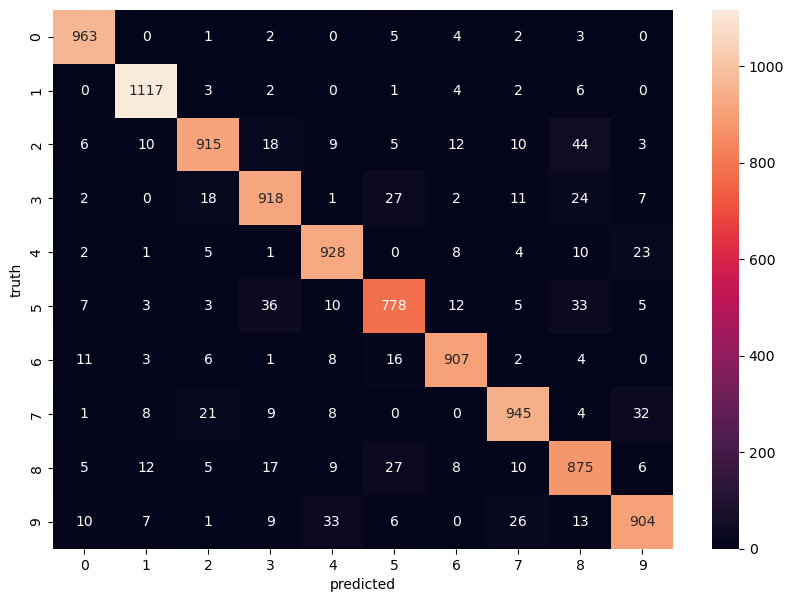

In [93]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [94]:
#963 times it predited 0 as 0 (means correct), but 6 times it predict 0 as 6 ,2 times 0 as 3, ...... 10 times 0 as 9
#black box values are errors

In [99]:
###Adding hidden layer:

In [100]:
model= keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened , y_train ,epochs=5)

    

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8732 - loss: 0.4486
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9614 - loss: 0.1350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9733 - loss: 0.0873
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9796 - loss: 0.0668
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9853 - loss: 0.0487


In [101]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9718 - loss: 0.0905


[0.07560666650533676, 0.9761000275611877]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Text(95.72222222222221, 0.5, 'truth')

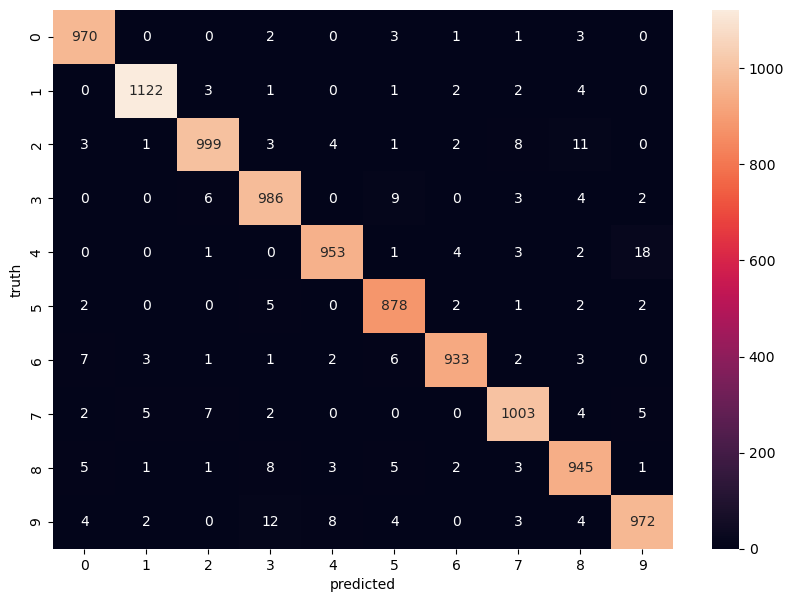

In [104]:
y_predicted=model.predict(x_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

#result after adding hidden layer 
#errors are minimized

In [108]:
#if u don't wanna transform to flattened array
#tf/keras provides the function(Flatten)

model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train ,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8706 - loss: 0.4629
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9608 - loss: 0.1358
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9737 - loss: 0.0891
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9799 - loss: 0.0654
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9841 - loss: 0.0501
